# **Predictive Analytics pada Utrecht Housing Dataset**

Akan dilakukan data loading dari file csv bernama utrecht housing huge dengan url sumber data di https://www.kaggle.com/datasets/ictinstitute/utrecht-housing-dataset?select=utrechthousinghuge.csv.

## **Data Loading**

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Memuat Dataset
data = "utrechthousinghuge.csv"
housing = pd.read_csv(data)
housing

id  zipcode  lot-len  lot-width  lot-area  house-area  garden-size  \
0     100426     3528     11.1        5.0      55.5      112.50         10.5   
1     100871     3528     13.6        5.0      68.0      112.50          8.0   
2     100936     3800     16.6        6.7     111.2      150.75         44.2   
3     100970     3800     18.6        6.0     111.6      108.00         39.6   
4     101191     3800     19.6        6.0     117.6      108.00         45.6   
...      ...      ...      ...        ...       ...         ...          ...   
1995  993057     3525     12.5        7.9      98.8      142.20         19.8   
1996  993131     3500     16.5        7.5     123.8      135.00         33.8   
1997  993444     3525     12.0        6.5      78.0      146.25         19.5   
1998  993873     3525     13.5        7.6     102.6      136.80         26.6   
1999  993963     3500     18.1        8.2     148.4      184.50         58.2   

      balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  retailvalue  \
0           2    2112    5113       1932          1    494000       670000   
1           0    2355    5218       1945          1    504000       675000   
2           2    2656    5200       1946          1    692000       869000   
3           2    2856    5201       1946          1    521000       628000   
4           1    2962    5266       1950          1    526000       610000   
...       ...     ...     ...        ...        ...       ...          ...   
1995        2    2252    5752       1990          2    648000       765000   
1996        2    2650    5768       1992          1    639000       728000   
1997        2    2204    5854       2000          2    647000       733000   
1998        1    2352    5958       2015          2    629000       694000   
1999        2    2814    5954       2012          2    857000       888000   

      energy-eff  monument  
0              0         1  
1              0         1  
2              0         1  
3              0         1  
4              0         1  
...          ...       ...  
1995           1         0  
1996           0         0  
1997           1         0  
1998           1         0  
1999           1         0  

[2000 rows x 16 columns]

Output dari kode yang telah dijalankan di atas memberikan informasi sebagai berikut:


*   Terdapat 2000 baris records atau jumlah pengamatan dalam dataset.
*   Terdapat 16 kolom pada dataset ini yaitu: id, zipcode, lot-len, lot-width, lot-area, house-area, garden-size, balcony, x-coor, y-coor, buildyear, bathrooms, taxvalue, retailvalue, energy-eff, dan monument.



## **Exploratory Data Analysis**

### Deskripsi Variabel

Berdasarkan informasi dari url pada Kaggle, variabel-variabel pada Utrecht Housing Dataset adalah sebagai berikut:


*   id: merepresentasikan angka antara 0 dan 100000 yang merupakan tanda pengenal unik untuk setiap rumah.
*   zipcode: merepresentasikan kode pos pada setiap rumah yang sesuai dengan area rumah tersebut.
*   lot-len: merepresentasikan panjang dalam meter dari sebidang tanah tempat rumah dibangun di mana setiap rumah dibangun di atas sebidang tanah persegi.
*   lot-width: merepresentasikan lebar dalam meter dari sebidang tanah tempat rumah dibangun, mulai dari 5.0 hingga 100.0 meter.
*   lot-area: merepresentasikan luas total dari kavling tanah tempat rumah dibangun, dapat dihitung dari lot-len dan lot-width.
*   house-area: merepresentasikan area tinggal rumah dalam meter persegi, 30.0 meter persegi merupakan rumah kecil.
*   garden-size: merepresentasikan ukuran taman dalam meter persegi.
*   balcony: merepresentasikan jumlah balkon yang dimiliki rumah tersebut yang pada umumnya berupa 0, 1, atau 2 balkon.
*   x-coor: merepresentasikan koordinat x yang menggambarkan lokasi rumah yang berada di nilai bilangan bulat antara 2000 dan 3000.
*   y-coor: merepresentasikan koordinat y yang menggambarkan lokasi rumah yang berada di nilai bilangan bulat antara 5000 dan 6000.
*   buildyear: merepresentasikan tahun saat rumah itu dibangun di mana beberapa rumah tertua berasal dari tahun 1100 namun sebagian besar rumah dibangun pada abad ke-20.
*   bathrooms: merepresentasikan jumlah kamar mandi yang dimiliki rumah tersebut yang sebagian besar rumah memiliki satu kamar mandi sementara beberapa rumah memiliki 2 atau 3 kamar mandi.
*   taxvalue: merepresentasikan nilai pajak rumah di mana angkanya berada di antara 50000 dan 1000000 yang merupakan nilai konvervatif.
*   retailvalue: merepresentasikan nilai pasar sebuah rumah di mana angkanya berada di antara 50000 dan 1000000 dengan angka dibulatkan ke 1000 terdekat, serta variabel ini akan dijadikan sebagai fitur target.
*   energy-eff: merepresentasikan kehematan energi pada suatu rumah dengan nilai 1 berarti rumah tersebut hemat energi di mana hal tersebut penting untuk tujuan iklim tertentu.
*   monument: merepresentasikan nilai monumental di mana beberapa rumah di Utrecht terutama rumah-rumah tua masih memiliki nilai tersebut karena memiliki desain arsitektur yang unik.




In [3]:
# Memuat Informasi Dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


Dari output informasi pada dataset dengan fungsi info() dapat terlihat bahwa:


*   Terdapat 5 kolom dengan tipe float, yaitu: lot-len, lot-width, lot-area, house-area, dan garden-size yang merupakan tipe data numerik bilangan desimal.
*   Terdapat 11 kolom dengan tipe int, yaitu: id, zipcode, balcony, x-coor, y-coor, buildyear, bathrooms, taxvalue, retailvalue, energy-eff, dan monument yang merupakan tipe data numerik bilangan bulat dengan salah satu kolom yang bernama retailvalue akan menjadi target fitur pada proyek ini.

Uraian tersebut telah menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai sehingga langkah selanjutnya akan dilakukan pengecekan deskripsi statistik data dengan fungsi describe().

Sebelum fungsi descibe(), akan dilakukan penghapusan kolom id dan zipcode terlebih dahulu karena pada kolom id bersifat unik untuk setiap baris dataset serta tidak memiliki informasi prediktif apapun terhadap kolom retailvalue sedangkan pada kolom zipcode memang dapat digunakan untuk mewakili lokasi terhadap prediksi harga rumah tetapi karena dalam bentuk angka mentah maka model ditakutkan salah menangkap hubungan linear padahal itu hanya berupa kode lokasi.



In [4]:
# Drop Kolom id dan zipcode
housing = housing.drop(['id', 'zipcode'], axis=1, errors="ignore")

# Memeriksa Ukuran Data Setelah Drop Kolom
housing.shape

(2000, 14)

In [5]:
# Memuat Informasi Dataset Setelah Drop Kolom
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lot-len      2000 non-null   float64
 1   lot-width    2000 non-null   float64
 2   lot-area     2000 non-null   float64
 3   house-area   2000 non-null   float64
 4   garden-size  2000 non-null   float64
 5   balcony      2000 non-null   int64  
 6   x-coor       2000 non-null   int64  
 7   y-coor       2000 non-null   int64  
 8   buildyear    2000 non-null   int64  
 9   bathrooms    2000 non-null   int64  
 10  taxvalue     2000 non-null   int64  
 11  retailvalue  2000 non-null   int64  
 12  energy-eff   2000 non-null   int64  
 13  monument     2000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 218.9 KB


In [6]:
# Memuat Deskripsi Statistik Data
housing.describe()

lot-len   lot-width     lot-area   house-area  garden-size  \
count  2000.000000  2000.00000  2000.000000  2000.000000   2000.00000   
mean     14.848500     7.75520   115.236600   139.884750     35.45365   
std       2.883188     1.69576    34.370459    41.745307     23.86576   
min      10.000000     5.00000    50.500000    67.500000      5.00000   
25%      12.425000     6.47500    89.100000   110.700000     13.87500   
50%      14.850000     7.65000   109.950000   135.000000     32.00000   
75%      17.275000     9.10000   138.325000   166.500000     52.55000   
max      19.700000    11.00000   215.600000   247.500000    115.50000   

           balcony       x-coor       y-coor    buildyear    bathrooms  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      1.152500  2484.360500  5484.435000  1969.044500     1.327000   
std       0.698203   288.399892   288.538538    26.358109     0.469235   
min       0.000000  2000.000000  5000.000000  1920.000000     1.000000   
25%       1.000000  2242.250000  5242.250000  1947.000000     1.000000   
50%       1.000000  2484.500000  5484.500000  1969.000000     1.000000   
75%       2.000000  2726.750000  5726.750000  1992.000000     2.000000   
max       2.000000  2969.000000  5969.000000  2018.000000     2.000000   

           taxvalue   retailvalue   energy-eff     monument  
count  2.000000e+03  2.000000e+03  2000.000000  2000.000000  
mean   6.517150e+05  7.910245e+05     0.501500     0.510000  
std    1.829273e+05  2.109795e+05     0.500123     0.500025  
min    3.100000e+05  4.190000e+05     0.000000     0.000000  
25%    5.210000e+05  6.317500e+05     0.000000     0.000000  
50%    6.330000e+05  7.660000e+05     1.000000     1.000000  
75%    7.592500e+05  9.072500e+05     1.000000     1.000000  
max    1.162000e+06  1.428000e+06     1.000000     1.000000

Fungsi describe() telah memberikan informasi statistik pada masing-masing kolom, antara lain:


*   count adalah jumlah sampel pada data.
*   mean adalah nilai rata-rata.
*   std adalah standar deviasi.
*   min adalah nilai minimum pada setiap kolom.
*   25% adalah kuartil pertama di mana kuartil merupakan nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua atau yang biasa disebut sebagai median (nilai tengah).
*   75% adalah kuartil ketiga.
*   max adalah nilai maksimum pada setiap kolom.








### Memeriksa Missing Value

Berdasarkan hasil fungsi describe(), dapat terlihat bahwa setiap kolom variabel tidak memiliki missing value tetapi untuk memastikan maka akan dilakukan pemeriksaan missing value pada setiap kolom variabel kecuali kolom balcony, energy-eff, dan monument karena tidak semua rumah memiliki balcony sedangkan untuk kolom energy-eff dan monument merupakan biner dengan hanya 0 dan 1 di mana nilai 0 menyatakan tidak dan nilai 1 menyatakan iya.

In [7]:
# Memeriksa Missing Value
lot_len = (housing['lot-len'] == 0).sum()
lot_width = (housing['lot-width'] == 0).sum()
lot_area = (housing['lot-area'] == 0).sum()
house_area = (housing['house-area'] == 0).sum()
garden_size = (housing['garden-size'] == 0).sum()
x_coor = (housing['x-coor'] == 0).sum()
y_coor = (housing['y-coor'] == 0).sum()
buildyear = (housing['buildyear'] == 0).sum()
bathrooms = (housing['bathrooms'] == 0).sum()
taxvalue = (housing['taxvalue'] == 0).sum()
retailvalue = (housing['retailvalue'] == 0).sum()

print("Nilai 0 di kolom lot-len ada:", lot_len)
print("Nilai 0 di kolom lot-width ada:", lot_width)
print("Nilai 0 di kolom lot-area ada:", lot_area)
print("Nilai 0 di kolom house-area ada:", house_area)
print("Nilai 0 di kolom garden-size ada:", garden_size)
print("Nilai 0 di kolom x-coor ada:", x_coor)
print("Nilai 0 di kolom y-coor ada:", y_coor)
print("Nilai 0 di kolom buildyear ada:", buildyear)
print("Nilai 0 di kolom bathrooms ada:", bathrooms)
print("Nilai 0 di kolom taxvalue ada:", taxvalue)
print("Nilai 0 di kolom retailvalue ada:", retailvalue)

Nilai 0 di kolom lot-len ada: 0
Nilai 0 di kolom lot-width ada: 0
Nilai 0 di kolom lot-area ada: 0
Nilai 0 di kolom house-area ada: 0
Nilai 0 di kolom garden-size ada: 0
Nilai 0 di kolom x-coor ada: 0
Nilai 0 di kolom y-coor ada: 0
Nilai 0 di kolom buildyear ada: 0
Nilai 0 di kolom bathrooms ada: 0
Nilai 0 di kolom taxvalue ada: 0
Nilai 0 di kolom retailvalue ada: 0


Berdasarkan hasil pemeriksaan missing value di atas, didapatkan bahwa setiap kolom kecuali kolom yang dikecualikan tidak memiliki missing value sehingga tidak perlu melakukan teknik untuk mengatasi missing value.



### Memeriksa Outlier

Akan dilakukan deteksi outliers menggunakan teknik visualisasi data, yaitu boxplot. Selanjutnya akan menangani outliers dengan teknik IQR method. IQR merupakan singkatan dari Inter Quartile Range di mana kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran dengan seperempat dari data berada di bawah kuartil pertama (Q1), setengah dari data berada di bawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3) sehingga dengan demikian interquartile range atau IQR = Q3 - Q1.

Variabel kolom yang akan divisualisasi data dengan boxplot, yaitu: lot-len, lot-width, lot-area, house-area, garden-size, buildyear, taxvalue, retailvalue, x-coor, dan y-coor. Untuk variabel kolom balcony, bathrooms, energy-eff, dan monument tidak dimasukkan karena untuk variabel energy-eff dan monument merupakan biner sehingga tidak perlu dideteksi outliernya sedangkan untuk balcony dan bathrooms berupa bilangan diskrit antara 0 sampai dengan 2 serta antara 1 sampai dengan 3 sehingga tidak perlu dideteksi juga outliernya.

<Axes: xlabel='lot-len'>

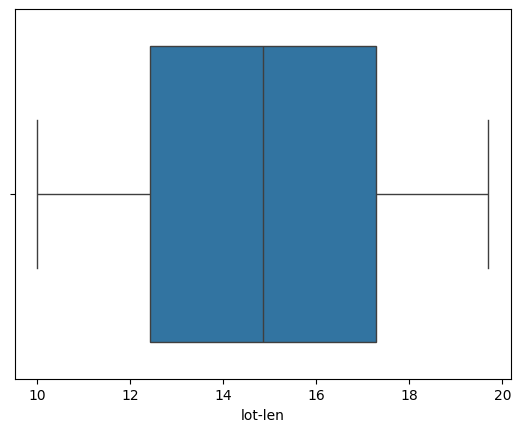

In [8]:
# Kolom lot-len
sns.boxplot(x=housing['lot-len'])

<Axes: xlabel='lot-width'>

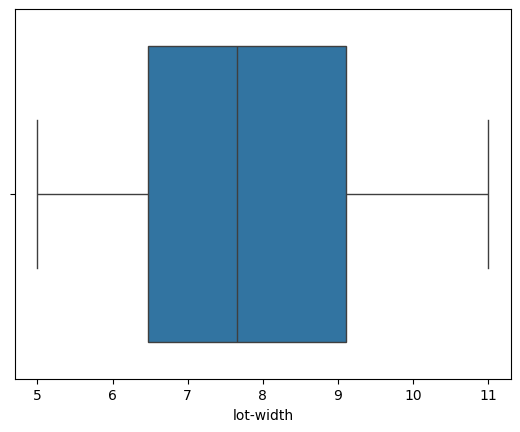

In [9]:
# Kolom lot-width
sns.boxplot(x=housing['lot-width'])

<Axes: xlabel='lot-area'>

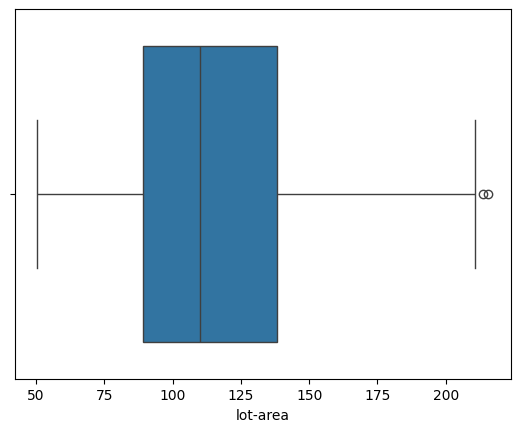

In [10]:
# Kolom lot-area
sns.boxplot(x=housing['lot-area'])

<Axes: xlabel='house-area'>

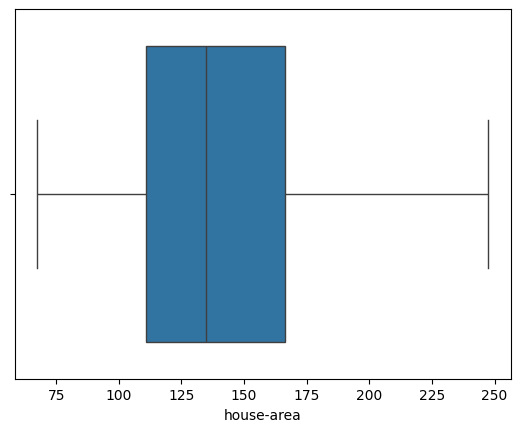

In [11]:
# Kolom house-area
sns.boxplot(x=housing['house-area'])

<Axes: xlabel='garden-size'>

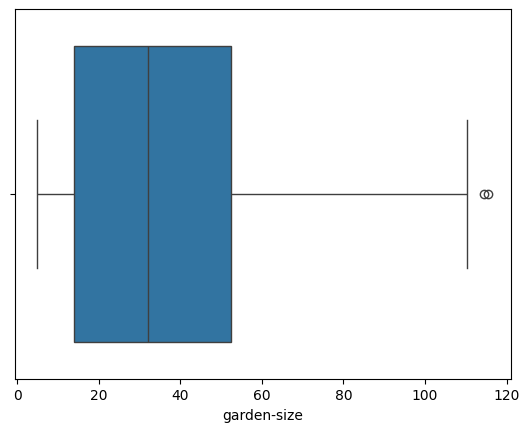

In [12]:
# Kolom garden-size
sns.boxplot(x=housing['garden-size'])

<Axes: xlabel='buildyear'>

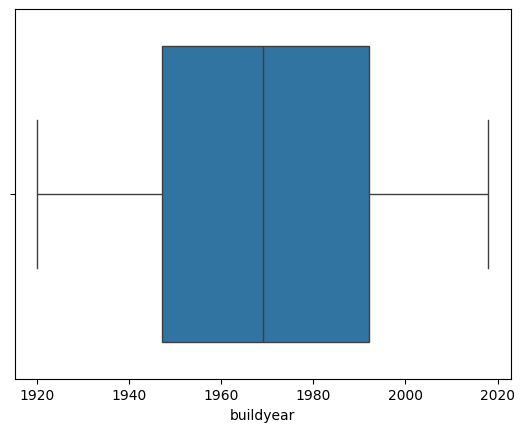

In [13]:
# Kolom buildyear
sns.boxplot(x=housing['buildyear'])

<Axes: xlabel='taxvalue'>

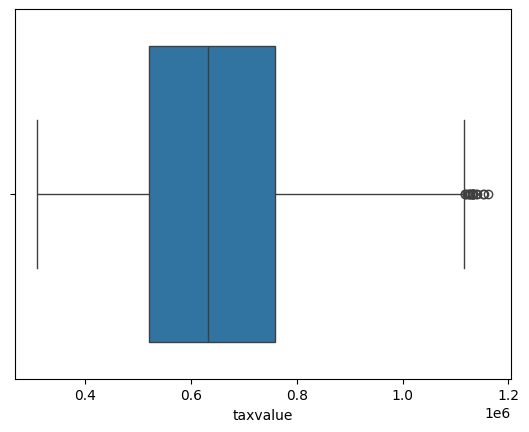

In [14]:
# Kolom taxvalue
sns.boxplot(x=housing['taxvalue'])

<Axes: xlabel='retailvalue'>

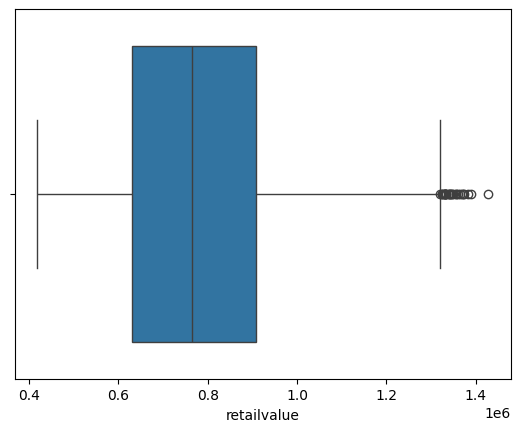

In [15]:
# Kolom retailvalue
sns.boxplot(x=housing['retailvalue'])

<Axes: xlabel='x-coor'>

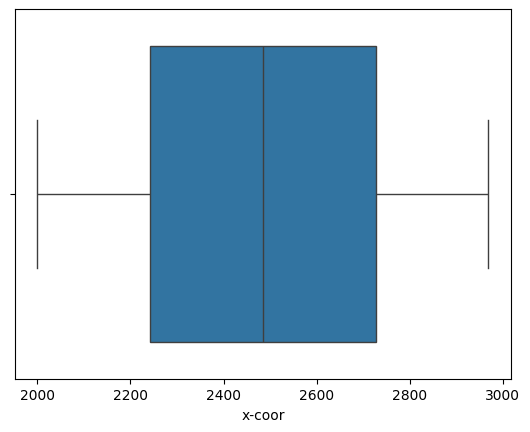

In [16]:
# Kolom x-coor
sns.boxplot(x=housing['x-coor'])

<Axes: xlabel='y-coor'>

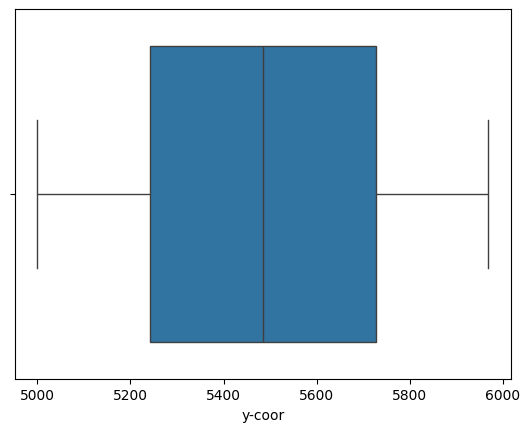

In [17]:
# Kolom y-coor
sns.boxplot(x=housing['y-coor'])

Selanjutnya akan melakukan penanganan outlier sengan metode IQR di mana menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3 sehingga nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [18]:
# Mengambil kolom yang akan digunakan untuk deteksi outlier
outlier_cols = housing.select_dtypes(include="number").columns

# Hitung Q1, Q3 dan IQR
Q1 = housing[outlier_cols].quantile(0.25)
Q3 = housing[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk baris yang TIDAK mengandung outlier
filter_outliers = ~((housing[outlier_cols] < (Q1 - 1.5 * IQR)) | (housing[outlier_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke seluruh dataset asli
housing = housing[filter_outliers]

# Cek ukuran dataset setelah outlier dihapus
housing.shape

(1961, 14)

Dari proses pemeriksaan dan penanganan outlier yang telah dilakukan, dataset yang telah bersih sekarang memiliki 1961 sampel.

### Univariate Analysis

Melakukan proses analisis data dengan teknik Univariate Exploratory Data Analysis di mana seluruh dataset yang akan dianalisis merupakan numerical features.

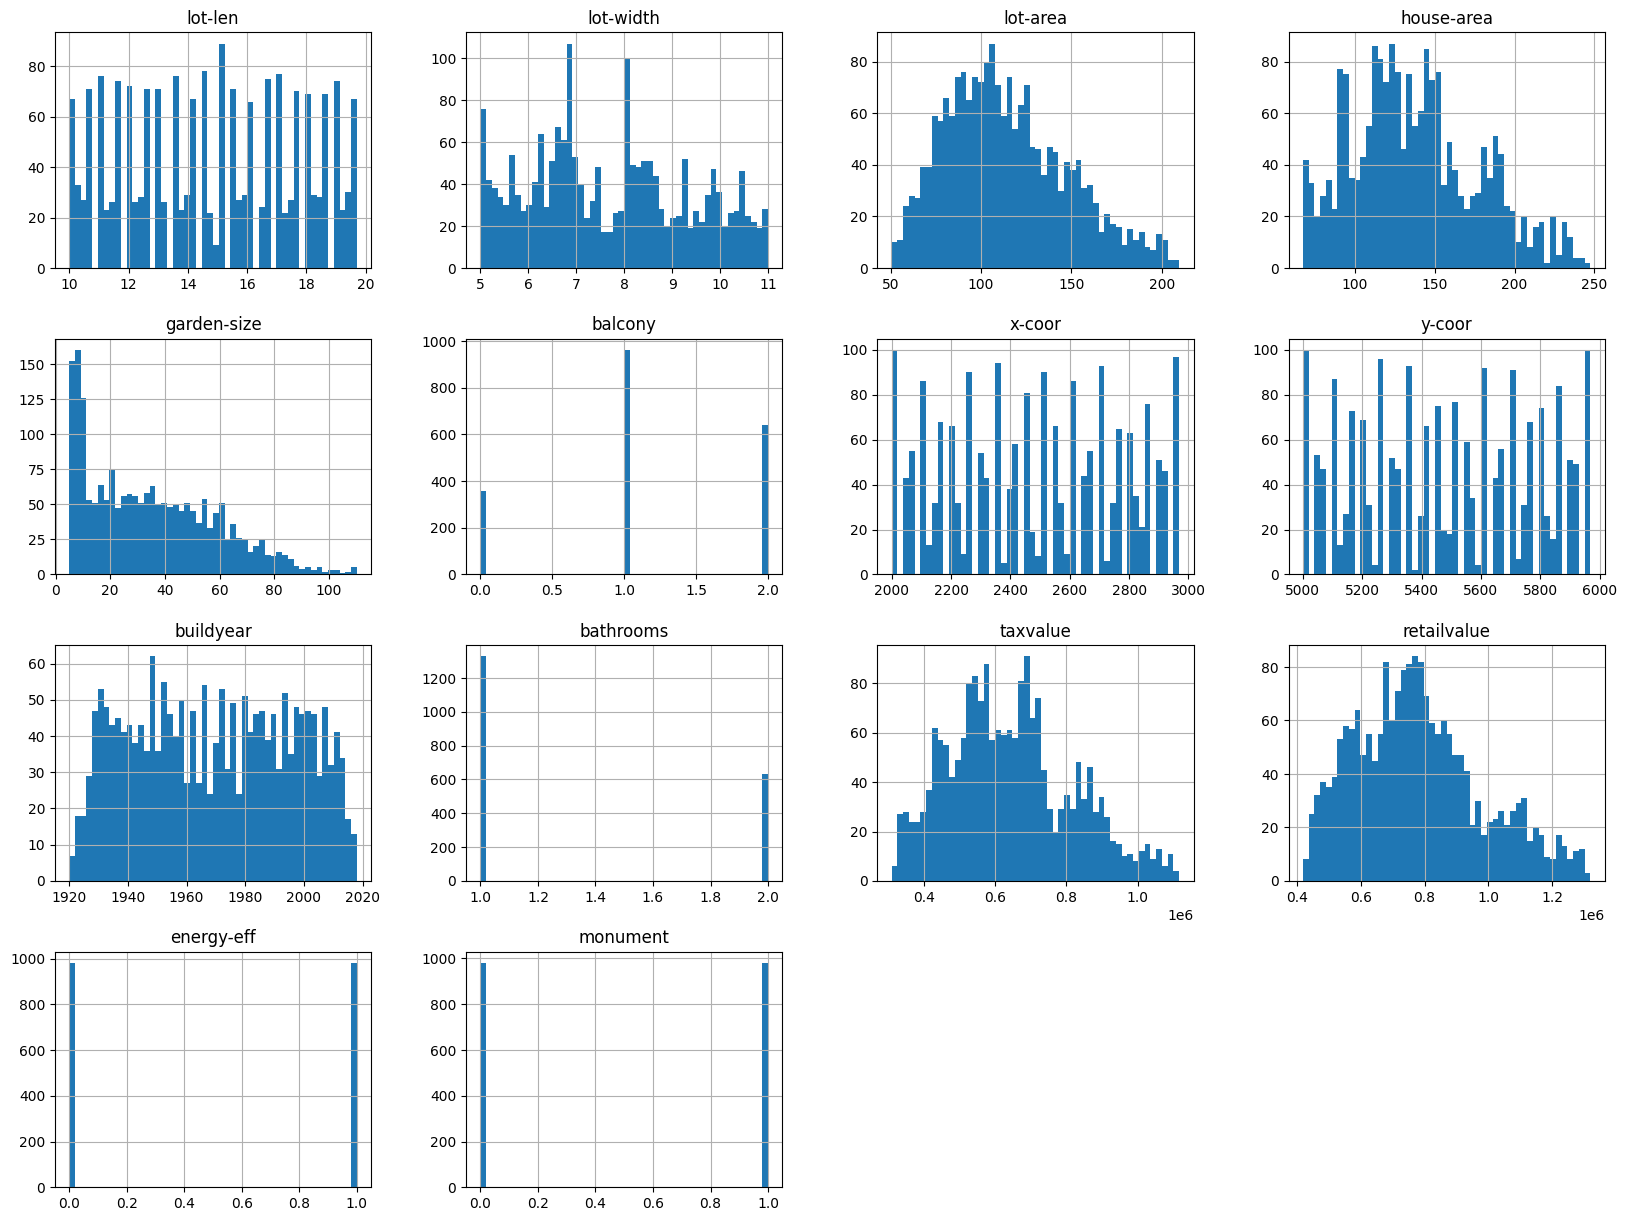

In [19]:
# Fitur Numerik Dataset
numerical_features = ['lot-len', 'lot-width', 'lot-area', 'house-area', 'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms', 'taxvalue', 'retailvalue', 'energy-eff', 'monument']

# Histogram Fitur Numerik
housing.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram fitur numerik, khususnya pada variabel "retailvalue" yang merupakan fitur target (label) pada data. Dari histogram "retailvalue", dapat diperoleh beberapa informasi, seperti:


*   Histogram retailvalue menunjukkan bahwa distribusi mendekati normal, tetapi terdapat sedikit kemiringan ke kanan (right-skewed) yang berarti sebagian besar rumah memiliki nilai jual atau retailvalue pada rentang menengah ke bawah namun terdapat juga beberapa rumah yang bernilai sangat tinggi walaupun sedikit.
*   Setiap peningkatan harga rumah (retailvalue) sebanding dengan penurunan jumlah sampel (frekuensi data) dengan grafik yang mengalami penurunan seiring yang berarti jumlah rumah dengan harga tinggi jauh lebih sedikit dibandingkan rumah dengan harga menengah atau rendah.



### Multivariate Analysis

Akan dilakukan multivariate exploratory data analysis di mana menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate exploratory data analysis yang menunjukkan hubungan antara dua variabel biasa dapat disebut sebagai bivariate exploratory data analysis. Pada langkah ini, akan dilakukan analisis data pada fitur numerik.

Pada langkah ini, akan melakukan pengamatan hubungan antara fitur numerik dengan menggunakan fungsi pairplot(). Tidak hanya itu, tetapi juga akan mengobservasi korelasi antar fitur numerik dengan fitur target menggunakan fungsi corr().

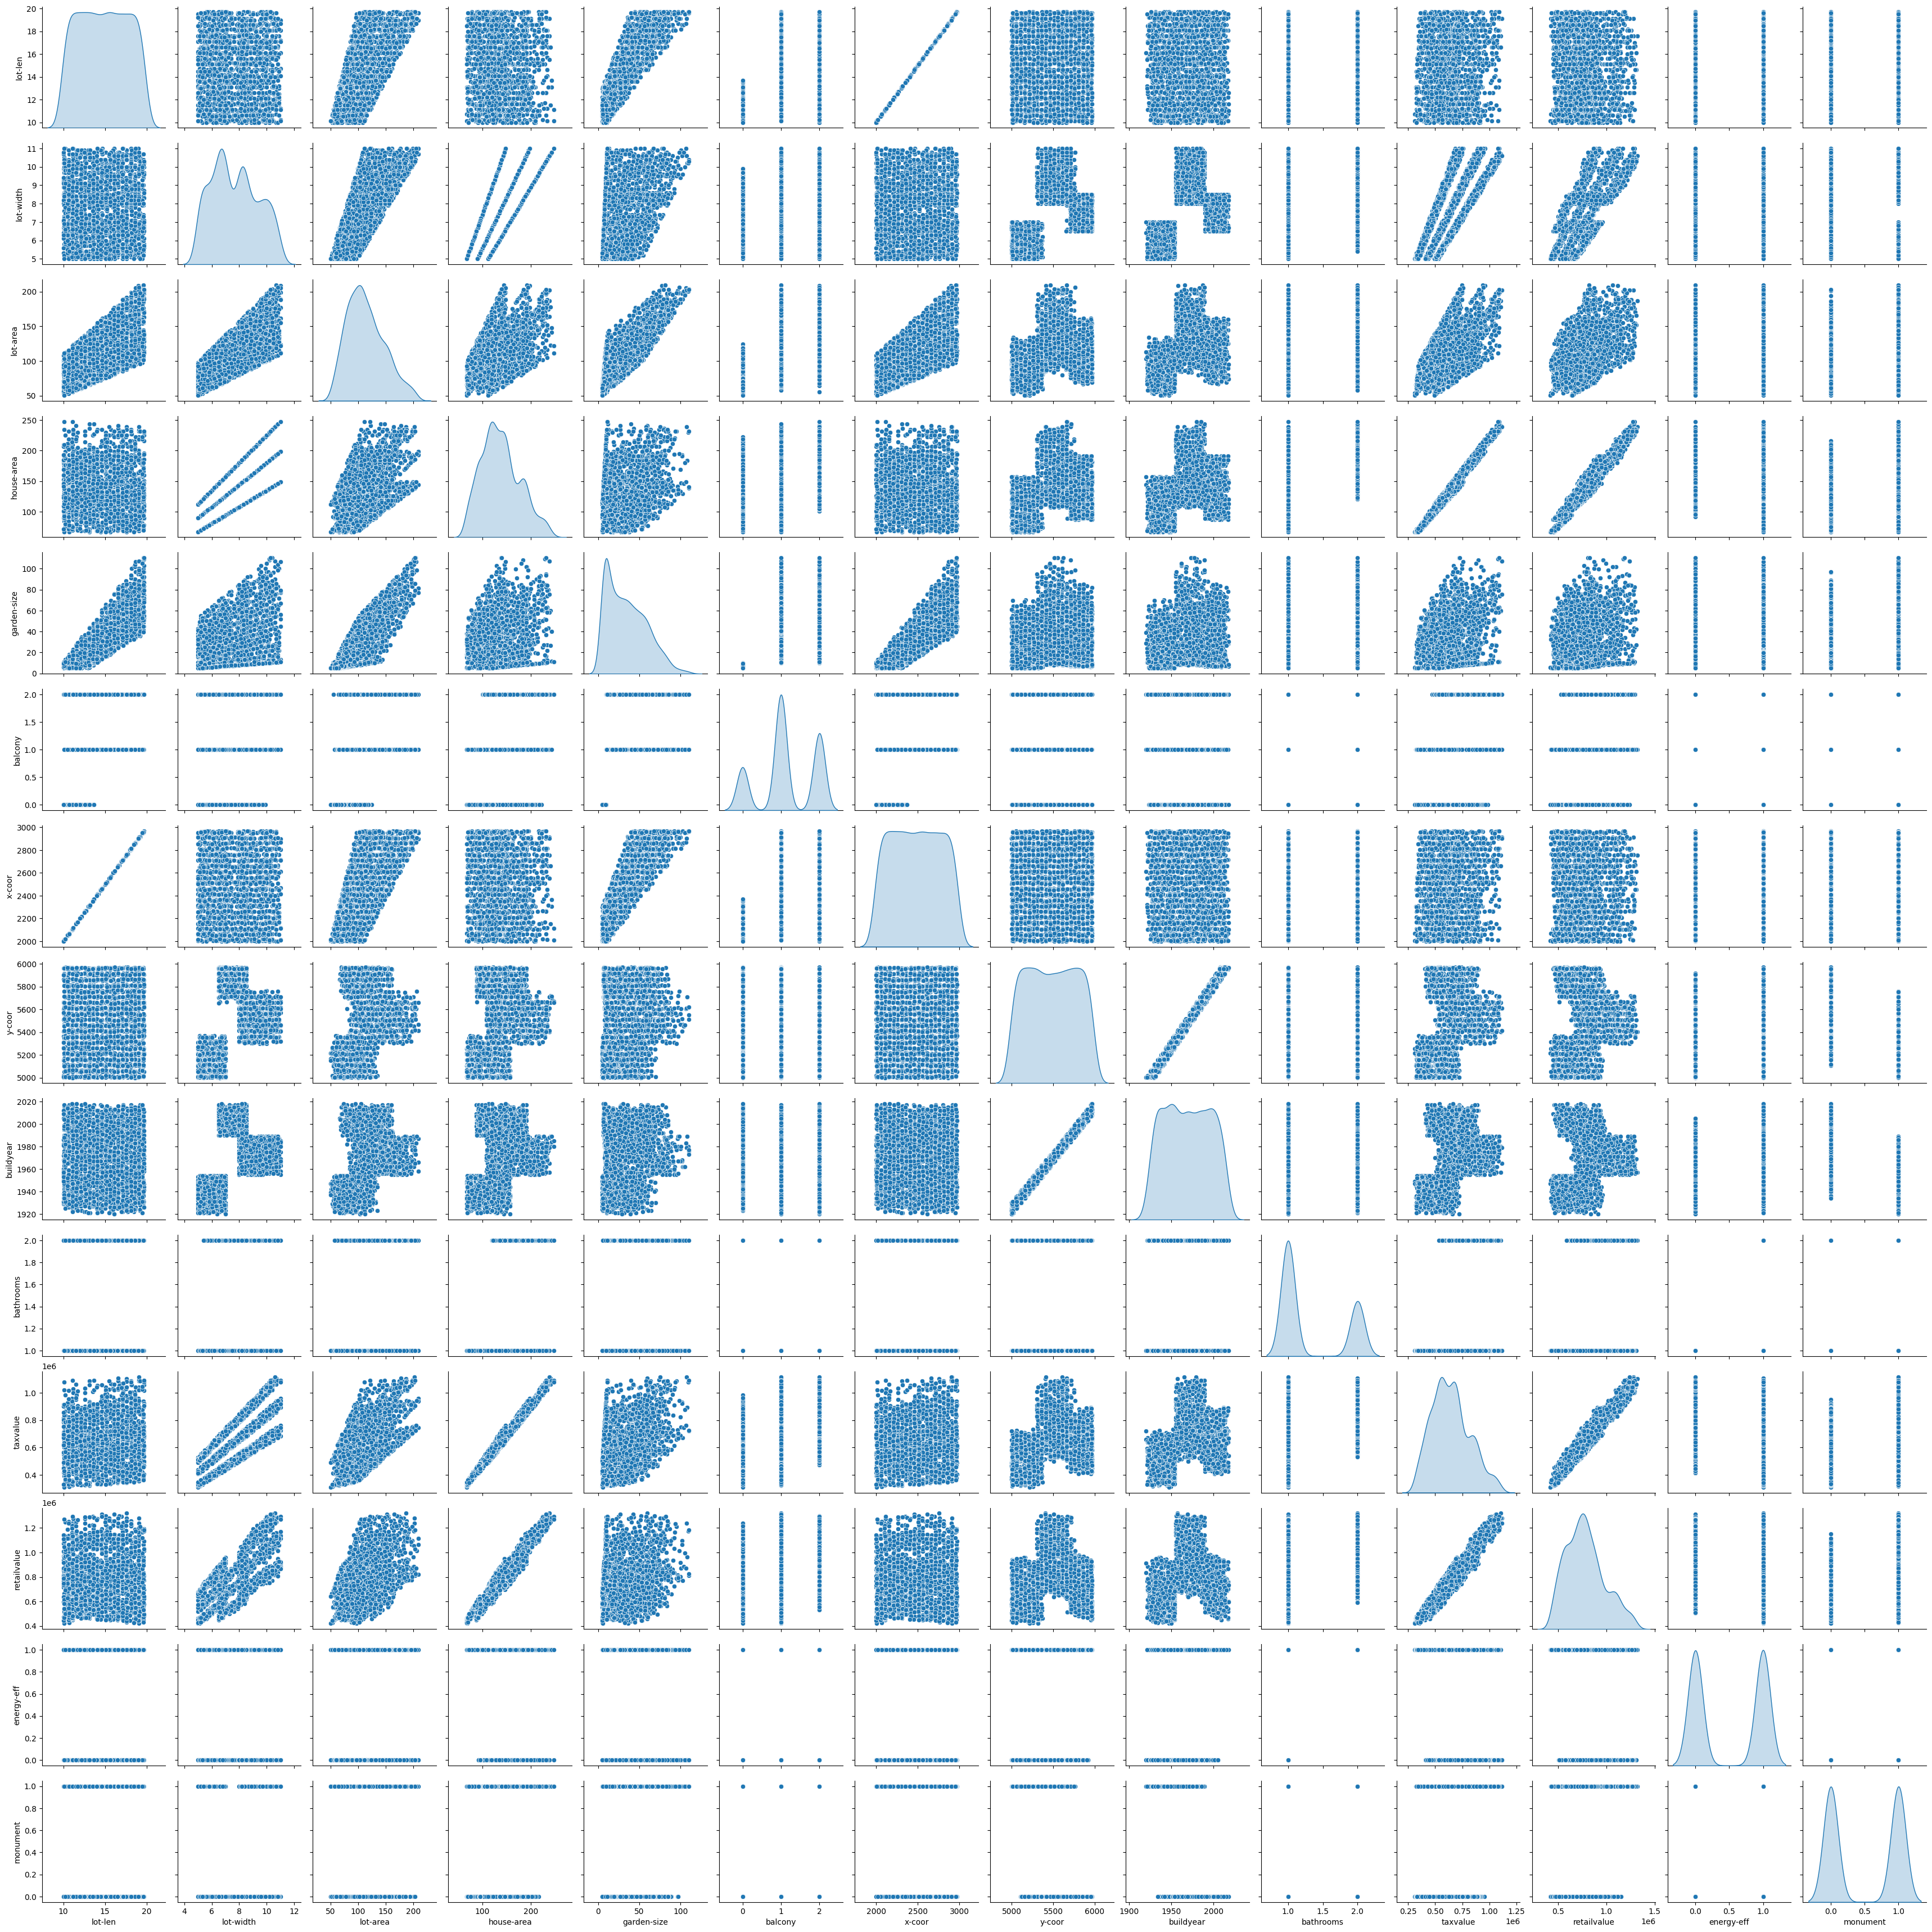

In [20]:
# Mengamati Hubungan antar Fitur Numerik dengan Fungsi pairplot()
sns.pairplot(housing, diag_kind = "kde")

Berdasarkan pola sebaran data grafik pairplot, kolom variabel 'taxvalue' memiliki korelasi yang tinggi dengan fitur "retailvalue", fitur 'house-area' dan 'lot-area' memiliki korelasi sedang, sedangkan fitur 'balcony', 'monument', 'energy-eff', 'bathrooms', dan 'buildyear' memiliki korelasi yang lemah karena sebarannya tidak membentuk pola sehingga akan melakukan evaluasi skor korelasi dengan menggunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix Fitur Numerik')

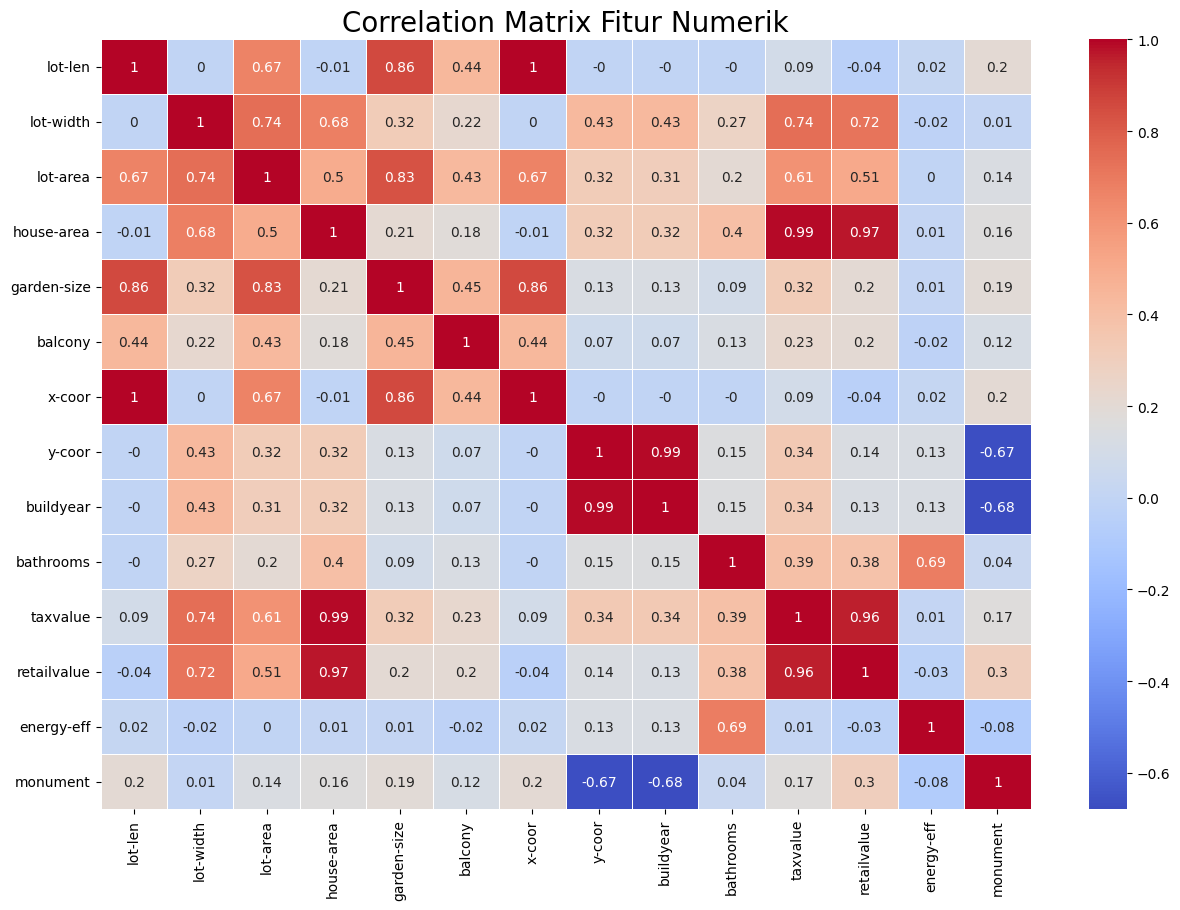

In [21]:
# Memeriksa Korelasi dengan Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, )
plt.title("Correlation Matrix Fitur Numerik", size=20)

Berdasarkan grafik korelasi di atas, fitur 'house-area', 'taxvalue', dan 'lot-width' memiliki skor korelasi yang besar (di atas 0.7) dengan fitur target "retailvalue". Artinya, fitur "retailvalue" berkorelasi tinggi dengan kedua fitur tersebut. Sementara, fitur 'lot-area' memiliki korelasi sedang (0.5). Lalu, fitur 'lot-len', 'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms', 'energy-eff', dan 'monument'
memiliki korelasi yang sangat kecil bahkan ada yang hampir tidak berkorelasi sehingga fitur tersebut akan didrop. Namun, karena ada beberapa fitur yang berkorelasi rendah maupun tidak berkorelasi yang masih masuk akal sehingga akan dipertahankan.

In [22]:
# Drop Fitur yang Berkorelasi Rendah maupun Tidak Berkorelasi
housing.drop(['lot-len', 'garden-size', 'balcony', 'x-coor', 'y-coor', 'bathrooms'], inplace=True, axis=1)
housing.head()

lot-width  lot-area  house-area  buildyear  taxvalue  retailvalue  \
0        5.0      55.5      112.50       1932    494000       670000   
1        5.0      68.0      112.50       1945    504000       675000   
2        6.7     111.2      150.75       1946    692000       869000   
3        6.0     111.6      108.00       1946    521000       628000   
4        6.0     117.6      108.00       1950    526000       610000   

   energy-eff  monument  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           0         1

## **Data Preparation**

Tahapan di mana melakukan proses transformasi data sehingga menjadi bentuk yang lebih cocok untuk proses pemodelan. Pada bagian ini akan dilakukan pembagian dataset dengan fungsi train_test_split dari library sklearn dan standarisasi.

### Train-Test-Split

Pada langkah ini, akan menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [23]:
# Pembagian Train-Test-Split
from sklearn.model_selection import train_test_split

X = housing.drop(['retailvalue'], axis=1)
y = housing['retailvalue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa Jumlah Sampel pada Masing-Masing Bagian
print(f"Jumlah sampel pada seluruh dataset: {len(X)}")
print(f"Jumlah sampel pada train dataset: {len(X_train)}")
print(f"Jumlah sampel pada test dataset: {len(X_test)}")

Jumlah sampel pada seluruh dataset: 1961
Jumlah sampel pada train dataset: 1568
Jumlah sampel pada test dataset: 393


### Standarisasi

Melakukan fitur standarisasi pada data latih lalu pada tahap evaluasi akan melakukan standarisasi pada data uji. Standarisasi dengan StandardScaler mengurangkan mean (nilai rata-rata) kemudian membagi dengan standar deviasi untuk menggeser distribusi di mana menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [24]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

features_numerical = ['lot-width', 'lot-area', 'house-area', 'buildyear', 'taxvalue', 'energy-eff', 'monument']
scaler = StandardScaler()
scaler.fit(X_train[features_numerical])
X_train[features_numerical] = scaler.transform(X_train.loc[:, features_numerical])
X_train[features_numerical].head()

lot-width  lot-area  house-area  buildyear  taxvalue  energy-eff  \
870    0.428337 -0.138197    1.298905   1.545478  1.160893    1.005115   
852   -0.657861 -0.224103   -0.485251  -1.162467 -0.478942   -0.994911   
676    0.549026  1.085233    0.429701  -0.259818  0.564063   -0.994911   
1228   0.428337  1.230386    0.338205   1.206985  0.500324   -0.994911   
1536   0.307648  0.149147    0.246710   0.906102  0.251161    1.005115   

      monument  
870       -1.0  
852        1.0  
676        1.0  
1228      -1.0  
1536      -1.0

In [25]:
# Memeriksa Nilai mean dan standar deviasi Setelah Proses Standarisasi
X_train[features_numerical].describe().round(4)

lot-width   lot-area  house-area  buildyear   taxvalue  energy-eff  \
count  1568.0000  1568.0000   1568.0000  1568.0000  1568.0000   1568.0000   
mean     -0.0000    -0.0000      0.0000     0.0000    -0.0000     -0.0000   
std       1.0003     1.0003      1.0003     1.0003     1.0003      1.0003   
min      -1.6234    -1.8771     -1.7891    -1.8395    -1.9276     -0.9949   
25%      -0.7785    -0.7721     -0.7140    -0.8616    -0.7339     -0.9949   
50%      -0.1148    -0.1471     -0.1078    -0.0342    -0.0907     -0.9949   
75%       0.7904     0.6727      0.6584     0.9061     0.5930      1.0051   
max       1.9973     2.8389      2.7857     1.8464     2.7428      1.0051   

        monument  
count  1568.0000  
mean      0.0000  
std       1.0003  
min      -1.0000  
25%      -1.0000  
50%       0.0000  
75%       1.0000  
max       1.0000

Berdasarkan hasil di atas, setelah dilakukan standarisasi sekarang nilai mean = 0 dan standar deviasi = 1.

## **Model Development**

Tahap pengembangan model di mana akan mengembangkan model machine learning dengan tiga algoritma kemudian akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi yang terbaik. Ketiga algoritma yang akan digunakan adalah K-Nearest Neighbor, Random Forest, dan Boosting Algorithm.

In [26]:
# Menyiapkan DataFrame untuk Analisis Model
models = pd.DataFrame(index=["train_mse", "test_mse"], columns=["KNN", "RF", "Boosting"])

### K-Nearest Neighbor

In [27]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc["train_mse", "knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

### Random Forest

In [28]:
# RF
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

models.loc["train_mse", "rf"] = mean_squared_error(y_pred = rf.predict(X_train), y_true = y_train)

### Boosting Algorithm

In [29]:
# Boosting
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=42)
boosting.fit(X_train, y_train)
models.loc["train_mse", "boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

## **Evaluasi Model**

Metrik yang akan digunakan pada prediksi harga saat ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

Sebelum menghitung nilai MSE dalam model, perlu melakukan proses scaling fitur numerik pada data uji baru melakukan proses scaling pada data latih untuk menghindari kebocoran data. Setelah model selesai dilatih dengan seluruh algoritma, akan melakukan proses scaling terhadap data uji. Hal ini perlu dilakukan agar skala antar data latih dan data uji sama serta dapat melakukan evaluasi.

In [30]:
# Melakukan Scaling Fitur Numerik pada X_test sehingga Memiliki rata-rata = 0 dan varians = 1
X_test.loc[:, features_numerical] = scaler.transform(X_test[features_numerical])

<ipython-input-30-209bebdbf1ce>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.56070124  1.31981627 -1.50096     0.49238857  0.52999892 -0.07176669
 -0.748753   -1.38812895 -0.44787019  1.69591978 -1.23768755  0.00345401
 -1.0496358  -1.46334965 -1.61379105 -0.29742879  1.39503698  1.43264733
 -0.78636335  0.04106436  1.65830943 -0.748753   -0.78636335  0.49238857
 -0.22220809  0.64282997 -1.72662211  0.56760927  1.84636118 -0.25981844
  0.64282997  0.37955752 -1.76423246  1.05654382  1.58308873  1.54547838
  1.62069908  0.94371277  1.20698522  1.01893347  0.68044032 -1.1248565
  0.75566102  0.79327137 -1.6514014   1.43264733 -0.67353229  1.35742663
 -0.63592194 -1.76423246 -0.63592194  1.47025768  1.77114048 -0.67353229
  0.56760927 -1.3505186   0.94371277 -1.0496358  -1.53857035  1.35742663
 -0.07176669 -0.48548054  0.37955752 -1.2000772   0.60521962  0.90610242
 -1.76423246 -1.61379105 -0.33503914 -0.97441

In [31]:
# Membuat Variabel mse yang Berisi DataFrame Nilai mse Data Train dan Test pada Masing-Masing Algoritma
mse = pd.DataFrame(columns=["train", "test"], index=["KNN", "RF", "Boosting"])

# Membuat Dictionary Setiap Algoritma yang Digunakan
model_dict = {"KNN": knn, "RF": rf, "Boosting": boosting}

# Menghitung Mean Squared Error Masing-Masing Algoritma pada Data Train dan Test
for name, model in model_dict.items():
  mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))/1e6
  mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))/1e6

# Memanggil mse
mse

train         test
KNN        290.068265   478.089873
RF         614.228786   680.004909
Boosting  1965.416334  1800.290884

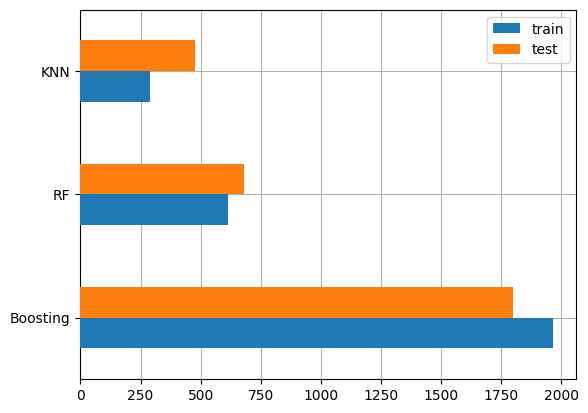

In [32]:
# Menampilkan Plot Metrik dengan Bar Chart
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder=0)

Berdasarkan visualisasi plot metrik dengan bar chart, dapat terlihat bahwa model K-Nearest Neighbor (KNN) menampilkan nilai error yang paling kecil sedangkan model dengan algoritma Boosting memiliki error terbesar sehingga model KNN yang akan dipilih sebagai model terbaik untuk melakukan prediksi harga Utrecht housing.

In [33]:
# Menguji dengan Prediksi Menggunakan Beberapa Harga dari Data Test
prediction = X_test.iloc[:1].copy()
pred_dict = {"y_true": y_test[:1]}
for name, model in model_dict.items():
  pred_dict["prediction_"+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

y_true  prediction_KNN  prediction_RF  prediction_Boosting
1111  555000        559000.0       564428.9             535426.0

Berdasarkan hasil pengujian di atas, dapat terlihat bahwa prediksi dengan K-Nearest Neighbor memberikan hasil yang paling mendekati.